# Making predictions on heart disease medical data 
**This project aims to classify whether a patient suffers from heart disease based on the given medical data.**

This project uses various ML **Python** libreries.

## 1. Problem definition
> Given medical data, the model can classify whether a patient has heart disease or not.

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. 

https://archive.ics.uci.edu/ml/datasets/heart+Disease

## 3. Evaluation

> If the model predicts heart disease with at least 95% accuracy, we can conclude that the project meets expectations.

## 4. Features 

Several features were used to predict heart disease while training the model:

### Features Used in Heart Disease Prediction Model

- **age** - Age in years  
- **sex** - (1 = male; 0 = female)  
- **cp** - Chest pain type:  
  - 0: Typical angina - chest pain related to decreased blood supply to the heart  
  - 1: Atypical angina - chest pain not related to the heart  
  - 2: Non-anginal pain - typically esophageal spasms (non-heart related)  
  - 3: Asymptomatic - chest pain not showing signs of disease  
- **trestbps** - Resting blood pressure (in mm Hg on admission to the hospital). Anything above 130-140 is typically cause for concern  
- **chol** - Serum cholesterol in mg/dl  
  - Serum = LDL + HDL + 0.2 * triglycerides  
  - Above 200 is cause for concern  
- **fbs** - (Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
  - '>126' mg/dL signals diabetes  
- **restecg** - Resting electrocardiographic results:  
  - 0: Nothing to note  
  - 1: ST-T Wave abnormality (can range from mild symptoms to severe problems, signals non-normal heartbeat)  
  - 2: Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber)  
- **thalach** - Maximum heart rate achieved  
- **exang** - Exercise-induced angina (1 = yes; 0 = no)  
- **oldpeak** - ST depression induced by exercise relative to rest (looks at stress of heart during exercise; unhealthy heart will stress more)  
- **slope** - The slope of the peak exercise ST segment:  
  - 0: Upsloping - better heart rate with exercise (uncommon)  
  - 1: Flat sloping - minimal change (typical for a healthy heart)  
  - 2: Downsloping - signs of an unhealthy heart  
- **ca** - Number of major vessels (0-3) colored by fluoroscopy  
  - Colored vessel means the doctor can see the blood passing through  
  - The more blood movement, the better (no clots)  
- **thal** - Thallium stress result:  
  - 1,3: Normal  
  - 6: Fixed defect - used to be a defect but is now okay  
  - 7: Reversible defect - no proper blood movement when exercising  
- **target** - Indicates whether the patient has heart disease (1 = yes; 0 = no) (= the predicted attribute)  

## Creating a heart disease classifier

### 5.1. Prepering the tools

We're going to use **Pandas** and **NumPy** to data analisis and data manipulations, as well as **matplotlib** and **seaborn** for data visualization.

In [1]:
#Importing libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing models from SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing SciKit-Learn evaluation's metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

### 5.2 Loading the data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 5.3 Exploratory data analisis (EDA)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Getting information about data target
pd.DataFrame(df.target.value_counts()) 

,count
target,
1,165
0,138


> **Conclusion**: we are going to build a model on balansed data where target is a binary classification

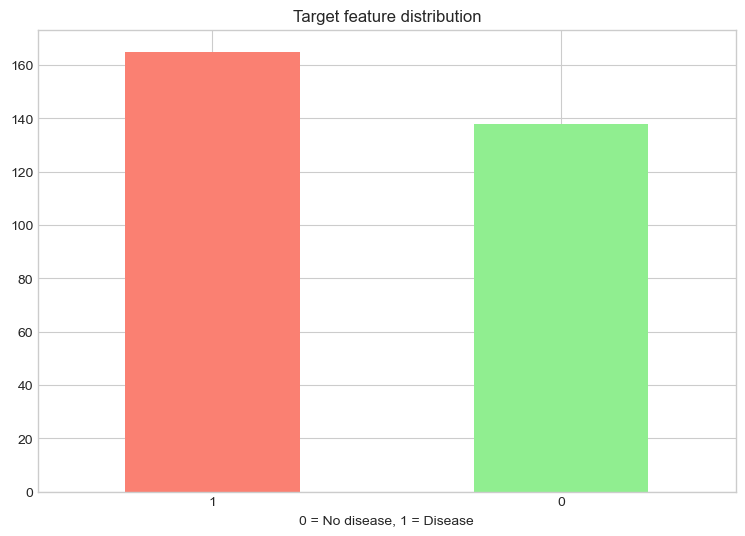

In [6]:
df.target.value_counts().plot(kind = 'bar',
                              color = ['salmon', 'lightgreen'],
                              figsize = (9, 6))
plt.title('Target feature distribution')
plt.xlabel('0 = No disease, 1 = Disease')
plt.xticks(rotation = 0)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Checking whether data includes missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> **Conclusion**: our data doesn't miss any data

#### 5.3.1 Heart disease frequency according to sex

In [9]:
pd.DataFrame(df.sex.value_counts())

,count
sex,
1,207
0,96


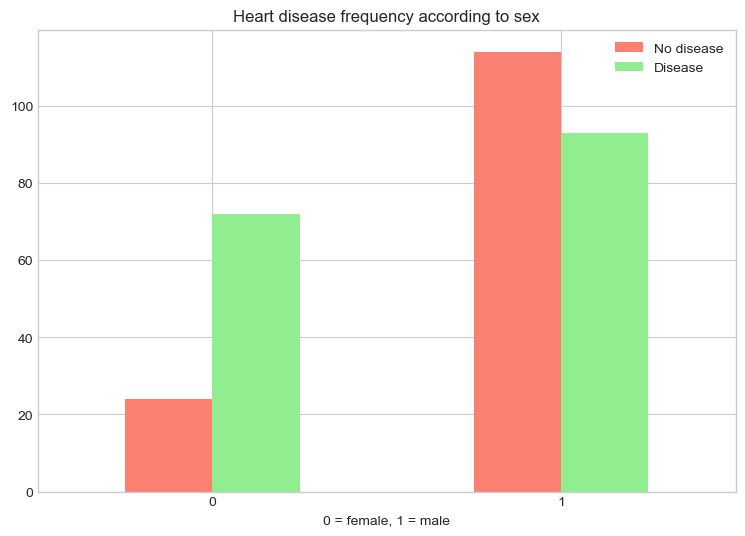

In [10]:
pd.crosstab(df.sex, df.target).plot(kind = 'bar',
                                    color = ['salmon', 'lightgreen'],
                                    figsize = (9, 6))
plt.title('Heart disease frequency according to sex')
plt.xlabel('0 = female, 1 = male')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation = 0)
plt.show()

> **Conclusion**: there more sample of male patients, but only less than a half of those have heart disease.
> According to given data, female patients more often have heart disease

### 5.3.2 Creating a correlation matrix
The correlation matrix is helpful in determining whether a certain feature has a significant impact on predicting heart disease.

In [11]:
df.corr().head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


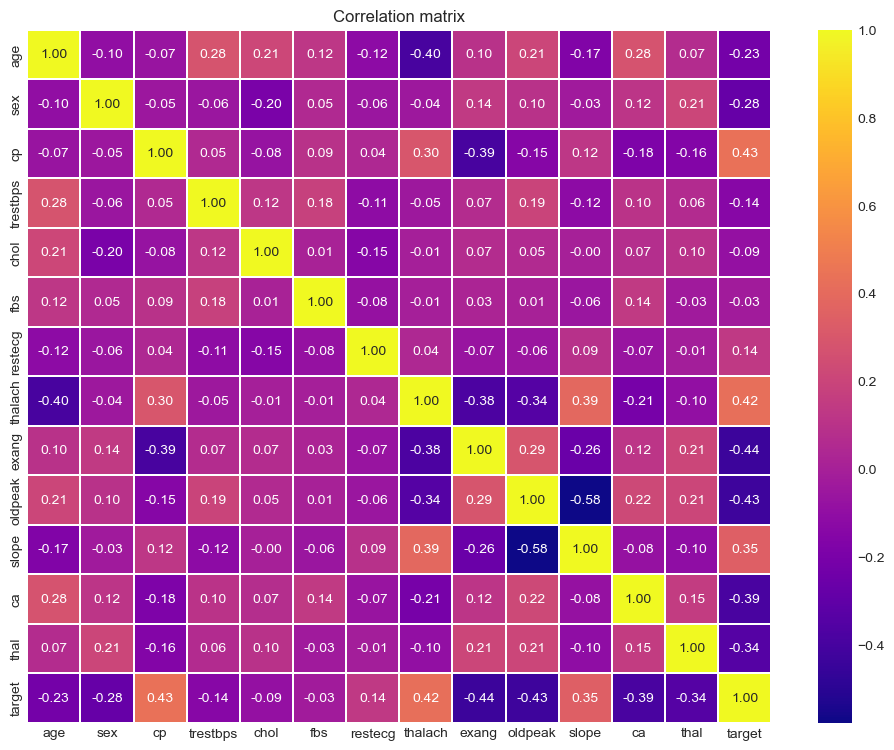

In [12]:
# Visualizing correlation matrix using seaborn 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (12, 9))
ax = sns.heatmap(corr_matrix, 
                 annot= True, 
                 linewidths= 0.3,
                 fmt='.2f',
                 cmap= 'plasma')
ax.set(title = 'Correlation matrix')
plt.show()

> **Conclusion**: we can find some positive and negative correlation between independent variables and target. Some of those correlations will be presented.

### 5.3.3 Age vs thalach correlation

* thalach - Maximum heart rate achieved

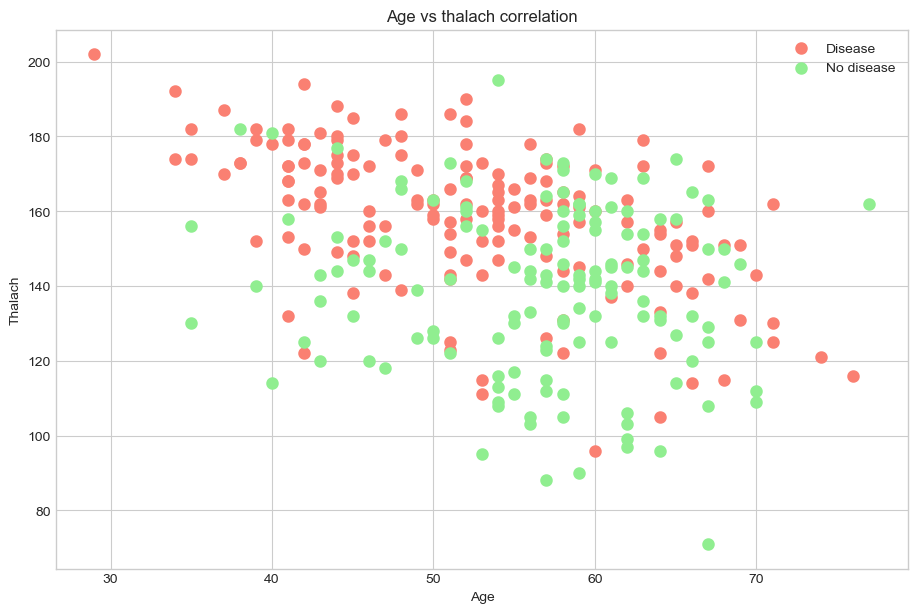

In [13]:
plt.figure(figsize = (11, 7))

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color = 'salmon',
            linewidths = 3)

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color = 'lightgreen',
            linewidths = 3)

plt.title('Age vs thalach correlation')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.legend(['Disease', 'No disease'])
plt.show()

> **Conclusion**: There is a positive correlation between a higher maximum heart rate achieved and the diagnosis of heart disease.

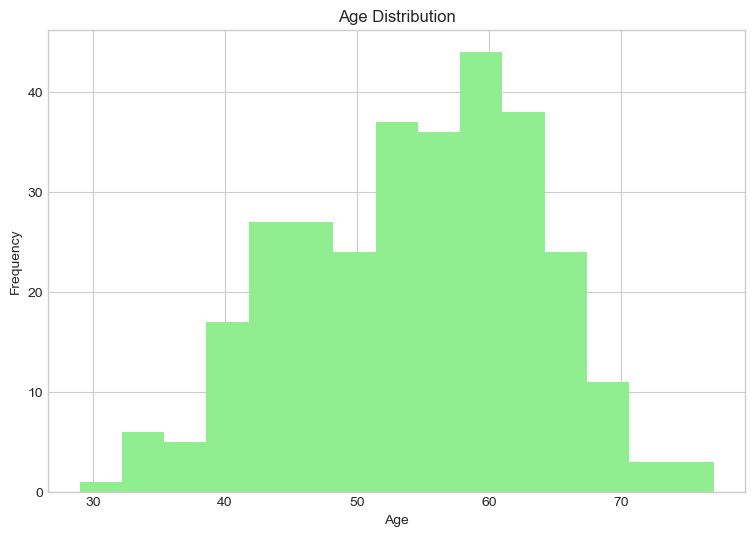

In [14]:
df.age.plot.hist(bins = 15, 
                 figsize = (9, 6), 
                 color = 'lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

> **Conclusion**: Age distribution is close to normal distribution with with a predominance of values between 55 and 65 years old

### 5.3.4 Heart disease frequency per chest pain type

**cp** - Chest pain type:  
  - 0: Typical angina - chest pain related to decreased blood supply to the heart  
  - 1: Atypical angina - chest pain not related to the heart  
  - 2: Non-anginal pain - typically esophageal spasms (non-heart related)  
  - 3: Asymptomatic - chest pain not showing signs of disease  

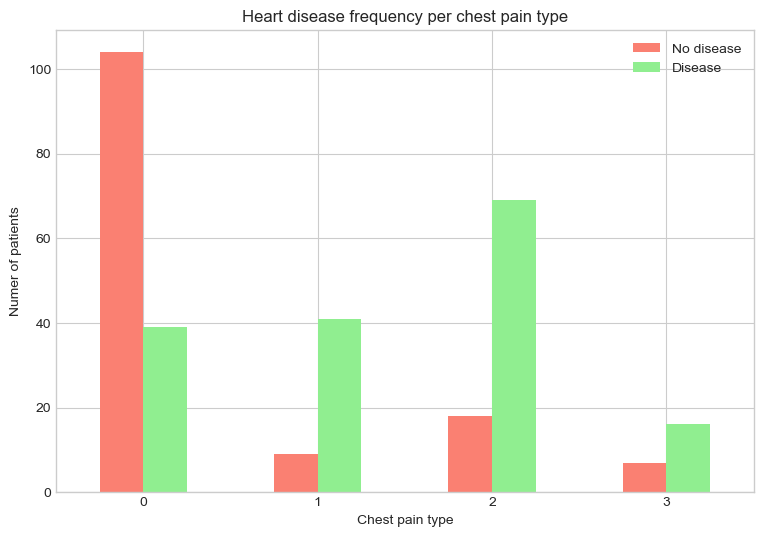

In [15]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (9, 6), 
                                   color = ['salmon', 'lightgreen'])
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Numer of patients')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation = 0)
plt.show()

> **Conclusion**: chest pain types: 1, 2, 3 are highly correlated with heart disease

## 5.4 Creating a estimator

In [16]:
# Preparing data 
X = df.drop('target', axis = 1)
y = df.target

In [17]:
# Spliting data into train (80%) and test (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Choosing the right **SciKit-Learn** estimator

For this classification problem we're going to try these sklearn estimatiors and eveluate them:
* Logistic Regressor
* K-Nearest Neighbour Classifier
* Random Forest Classifier

In [18]:
# Prepering models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbour Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Creating function to train given models on train data and evaluate them on given test data 
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):

    # Setting a random seed
    np.random.seed(42)
    
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [19]:
# Executing created function to see the evaluation of given estimatiors
np.random.seed(42)

models_score = fit_and_evaluate(models, X_train, X_test, y_train, y_test)
pd.DataFrame(models_score, index = ['Accuracy'])

,Logistic Regression,K-Nearest Neighbour Classifier,Random Forest Classifier
Accuracy,0.852459,0.655738,0.786885


## Models Comparison

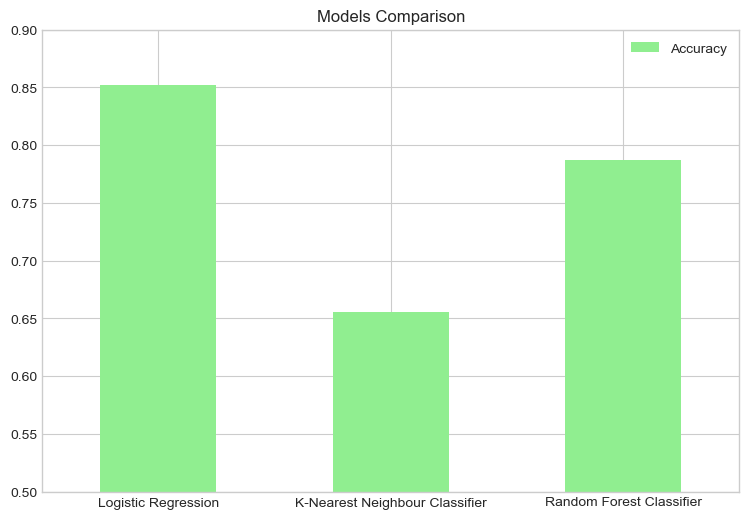

In [20]:
model_compare = pd.DataFrame(models_score, index = ['Accuracy'])
model_compare.T.plot(kind = 'bar', 
                     ylim = [0.5, 0.9], 
                     color = 'lightgreen',
                     figsize = (9, 6))
plt.title('Models Comparison')
plt.xticks(rotation = 0)
plt.show()

> **Conclution**: All given estimatiors gave accuraty results in range between 68% - 88%.
> Let's tune all of them to tell which of them give the best results

## 5.5 Hyperparameter Tuning

In a next step we're going to tune hyperparameters of given models to improve theirs score. 

In order to do so we're be using **RandomSearchCV** and **GridSearchCV**

In a first step we'll performe RandomSearchCV

In [21]:
# Creating grids for RandomSearchCV
log_reg_grid = {
    'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
  
rf_class_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

kn_neigh_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

In [22]:
models_and_grids = {
    'Logistic Regressor': [LogisticRegression(), log_reg_grid],
    'K-Nearest Neighbour Classifier': [KNeighborsClassifier(), kn_neigh_grid],
    'Random Forest Classifier': [RandomForestClassifier(), rf_class_grid]
}

In [23]:
# Creating a hyperparameter tuning function using RandomSearchCV with cross validation
np.random.seed(42)

def tuning(models_and_grids):
    tuned_models = {}
    best_params = {}
    score = {}
    
    for name, model_and_grid in models_and_grids.items():
        tuned_models[name] = RandomizedSearchCV(
            estimator = model_and_grid[0], 
            param_distributions = model_and_grid[1],
            cv = 5,
            n_iter = 10,
            verbose = True
        )

        tuned_models[name].fit(X_train, y_train)
        best_params[name] = tuned_models[name].best_params_
        score[name] = tuned_models[name].score(X_test, y_test)
    return best_params, score

In [24]:
# Tunning estimators
np.random.seed(42)

tuned_models = tuning(models_and_grids)
tuned_models

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'Logistic Regressor': {'solver': 'newton-cg',
   'penalty': 'l2',
   'max_iter': 100,
   'C': 78.47599703514607},
  'K-Nearest Neighbour Classifier': {'weights': 'distance',
   'p': 1,
   'n_neighbors': 17,
   'metric': 'minkowski'},
  'Random Forest Classifier': {'n_estimators': 300,
   'min_samples_split': 6,
   'min_samples_leaf': 5,
   'max_features': 'sqrt',
   'max_depth': None,
   'bootstrap': False}},
 {'Logistic Regressor': 0.8524590163934426,
  'K-Nearest Neighbour Classifier': 0.7049180327868853,
  'Random Forest Classifier': 0.819672131147541})

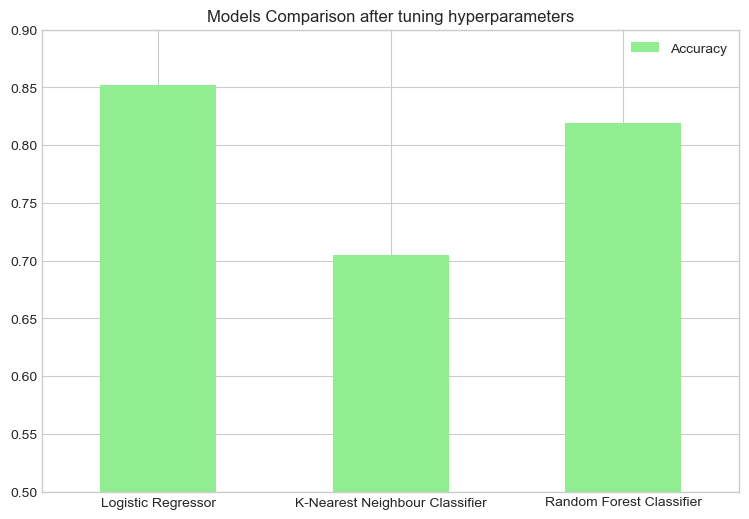

In [25]:
pd.DataFrame(tuned_models[1], index = ['Accuracy']).T.plot(
    kind = 'bar', 
    figsize = (9, 6), 
    color = 'lightgreen',
    ylim = [0.5, 0.9]
)
plt.title('Models Comparison after tuning hyperparameters')
plt.xticks(rotation = 0)
plt.show()

In [26]:
pd.DataFrame(tuned_models[1], index = ['Accuracy']).T

,Accuracy
Logistic Regressor,0.852459
K-Nearest Neighbour Classifier,0.704918
Random Forest Classifier,0.819672


> Conclusion: Logistic Regressor and Random Forest Classifier are prerforming much better than K-Nearest Neighbour Classifier so we'll perform tuning hyperparameters with GridSearchCV on these two better estimators only.

#### First attempt of tuning hyperparameters of Logistic Regression estiomator

In [27]:
log_reg_grid = {
    'penalty':['l1','l2','elasticnet', None],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [50,100,200,500,1000,2500]
}

np.random.seed(42)

log_tuning = GridSearchCV(
            estimator = LogisticRegression(), 
            param_grid = log_reg_grid,
            cv = 5,
            verbose = True
        )
log_tuning.fit(X_train, y_train)
log_tuning.best_params_

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


{'C': 29.763514416313132, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}

In [28]:
log_tuning.best_score_

0.8428571428571429

#### Second attempt of tuning hyperparameters of Logistic Regression estiomator

In [29]:
log_reg_grid = {
    'penalty':['l2'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs'],
    'max_iter'  : np.arange(10, 80, 8)
}

np.random.seed(42)

log_tuning = GridSearchCV(
            estimator = LogisticRegression(), 
            param_grid = log_reg_grid,
            cv = 5,
            verbose = True
        )
log_tuning.fit(X_train, y_train)
log_tuning.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'C': 29.763514416313132, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}

In [30]:
log_tuning.best_score_

0.8428571428571429

#### First attempt of tuning hyperparameters of Random Forest Classifier estiomator

In [ ]:
rfc_class_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': np.arange(2, 20, 4),
    'min_samples_leaf': np.arange(1, 20, 4),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

np.random.seed(42)

rfc_tuning = GridSearchCV(
            estimator = RandomForestClassifier(), 
            param_grid = rfc_class_grid,
            cv = 3,
            verbose = True
        )
rfc_tuning.fit(X_train, y_train)
rfc_tuning.best_params_

Fitting 3 folds for each of 2250 candidates, totalling 6750 fits


In [ ]:
rfc_tuning.best_score_

#### Second attempt of tuning hyperparameters of Logistic Regression estiomator

In [ ]:
rfc_class_grid = {
    'n_estimators': [100, 200],
    'max_depth': [30, None],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 20, 4),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

np.random.seed(42)

rfc_tuning = GridSearchCV(
            estimator = RandomForestClassifier(), 
            param_grid = rfc_class_grid,
            cv = 5,
            verbose = True
        )
rfc_tuning.fit(X_train, y_train)
rfc_tuning.best_params_

In [ ]:
rfc_tuning.best_score_

> **Conclusion**: we managed to improve the Random Forest Classifier score at second attempt, hoverver that score is still worse than Logistic Regression, so in a next step we're going to evaluate Logistic Regression estimatior

In [ ]:
models_score_after_tuning = pd.DataFrame({
    'Logistic Regression': log_tuning.best_score_,
    'Random Forest Classifier': rfc_tuning.best_score_
}, index = ['Best score'])

models_score_after_tuning.T.plot(
    kind = 'bar',
    color = 'lightgreen',
    ylim = [0.7, 0.9]
)
plt.xticks(rotation = 0)
plt.title('Tuned models comparason')
plt.show()

#### Comparing model's accuracy before and after tuning hyperparameters

In [ ]:
models_score_after_tuning.reset_index(drop = True, inplace = True)

In [ ]:
models_score = pd.DataFrame(models_score.items()).iloc[[0, 2]]
models_score = models_score.set_index(0)

In [ ]:
models_score_after_tuning

In [ ]:
tuning_efects = pd.concat([models_score.T, models_score_after_tuning])
tuning_efects

In [ ]:
tuning_efects.T.plot(
    kind = 'bar', 
    color = ['salmon', 'lightgreen'],
    figsize = (9, 6),
    ylim = [0.6, 0.9]
)
plt.title('Accuracy score before and after tuning hyperparameters')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(['Before tuning', 'After tuning'])
plt.xticks(rotation = 0)
plt.show()

> **Conclusion**: Logistic Regression and Random Forest Classifier were performing similar, but Logistic Regression got better results, so this is the model that is going to be evaluated.

## 5.6. Evaluating 

### 5.6.1. ROC curve and AUC metric

In [ ]:
RocCurveDisplay.from_estimator(
    estimator = log_tuning,
    X = X_test,
    y = y_test
);

### 5.6.2. Confusion matrix

In [ ]:
y_preds = log_tuning.predict(X_test)

In [ ]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize = (9, 6))
    ax = sns.heatmap(
        confusion_matrix(y_test, y_preds), 
        annot = True,
        cbar = False
    )
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion matrix')

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))